In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("breast_training_genes_set.csv", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.134221,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.134221,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402
A1CF,0.012519,0.049011,0.027968,0.083588,0.051826,0.026635,0.023306,0.083143,0.066640,0.022402,...,0.000000,0.097611,0.000000,0.000000,0.028569,0.014355,1.035624,0.056584,0.000000,0.000000
ABCB11,0.025234,0.134350,0.022705,0.025485,0.056066,0.007628,0.025462,0.056422,0.027006,0.027425,...,0.000000,0.000000,0.014355,0.411426,0.000000,0.000000,0.000000,0.014355,0.028569,0.000000
ABCB4,0.034718,0.044488,0.116877,0.012680,0.050047,0.031387,0.038453,0.033307,0.038715,0.047008,...,0.226509,0.028569,0.000000,0.028569,0.028569,2.845992,0.000000,0.028569,0.124328,0.176323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRANB2,0.210286,0.102221,0.564531,0.332934,0.601723,0.114838,0.769426,0.428650,0.215567,0.525779,...,6.173327,6.454505,6.163700,6.328047,5.955127,6.387673,5.124328,5.573496,4.943921,6.175525
ZSCAN10,0.086695,0.009916,0.037760,0.032992,0.034188,0.130468,0.206473,0.053290,0.025119,0.139728,...,2.508429,0.028569,0.070389,0.000000,0.070389,0.124328,0.000000,0.000000,0.014355,0.028569
ZSCAN23,0.008714,0.008937,0.033176,0.005790,0.024392,0.005020,0.032277,0.012317,0.047684,0.006569,...,1.757023,1.416840,0.941106,1.144046,0.000000,0.000000,0.000000,0.000000,0.000000,1.992768
ZSCAN23,0.008714,0.008937,0.033176,0.005790,0.024392,0.005020,0.032277,0.012317,0.047684,0.006569,...,1.757023,1.416840,0.941106,1.144046,0.000000,0.000000,0.000000,0.000000,0.000000,1.992768


A1BG       False
A1BG       False
A1CF       False
ABCB11     False
ABCB4      False
           ...  
ZRANB2     False
ZSCAN10    False
ZSCAN23    False
ZSCAN23    False
ZSWIM1     False
Name: label, Length: 1380, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.85068466 0.00938113 0.00674455 0.00560057 0.00478532 0.0033264
 0.00314524 0.00276124]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.90215977 0.00458497 0.00429297 0.0038945  0.00315487 0.00269627
 0.00202327 0.00188837]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.81729334 0.0279478  0.02152331 0.01060063 0.00493454 0.00429662
 0.00366488 0.00351084]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(1380, 24)


(487, 24)
(487,)
238


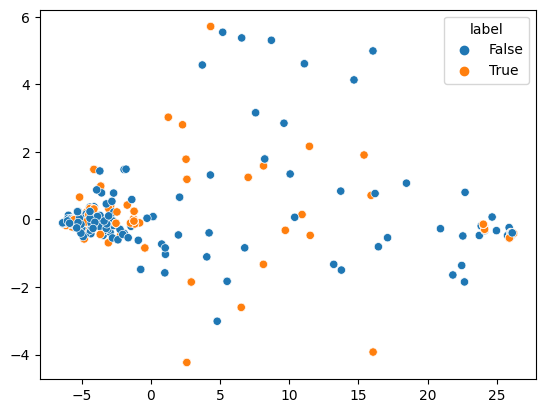

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.7210884353741497
Precision:0.7166666666666667
Recall:0.6417910447761194


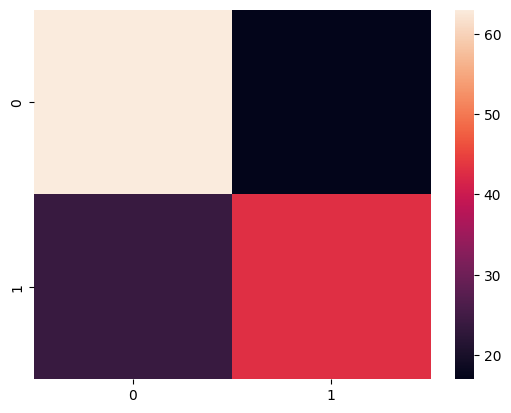

[[63 17]
 [24 43]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
11/11 [==============================] - 2s 98ms/step - loss: 2.0375 - accuracy: 0.5265 - val_loss: 1.4659 - val_accuracy: 0.5918
Epoch 2/5
11/11 [==============================] - 0s 36ms/step - loss: 1.5329 - accuracy: 0.5294 - val_loss: 1.7646 - val_accuracy: 0.5238
Epoch 3/5
11/11 [==============================] - 0s 39ms/step - loss: 1.2956 - accuracy: 0.5735 - val_loss: 1.8905 - val_accuracy: 0.5306
Epoch 4/5
11/11 [==============================] - 1s 56ms/step - loss: 1.1676 - accuracy: 0.5971 - val_loss: 1.3199 - val_accuracy: 0.5646
Epoch 5/5
11/11 [==============================] - 0s 33ms/step - loss: 1.0023 - accuracy: 0.6294 - val_loss: 1.1832 - val_accuracy: 0.6395


Text(0, 0.5, 'Loss')

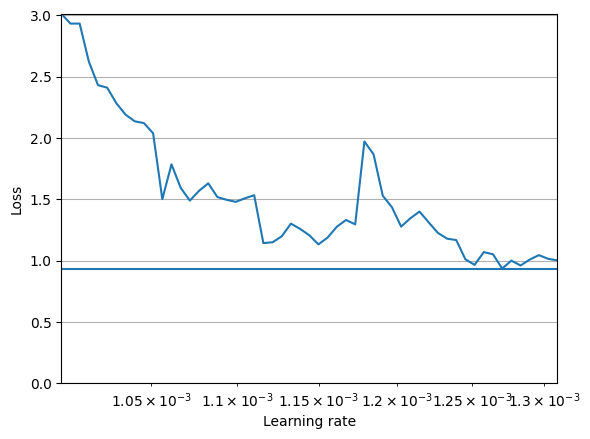

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 0.9352008700370789
Best learning rate: 0.0012704892


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "breasttypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\breasttypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("breasttypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
11/11 [==============================] - 2s 76ms/step - loss: 5.1975 - accuracy: 0.3294 - val_loss: 2.5151 - val_accuracy: 0.4218
Epoch 2/200
11/11 [==============================] - 0s 26ms/step - loss: 1.6273 - accuracy: 0.4765 - val_loss: 1.7150 - val_accuracy: 0.4694
Epoch 3/200
11/11 [==============================] - 0s 21ms/step - loss: 1.2284 - accuracy: 0.5618 - val_loss: 1.8025 - val_accuracy: 0.4558
Epoch 4/200
11/11 [==============================] - 1s 61ms/step - loss: 1.0338 - accuracy: 0.5971 - val_loss: 1.3075 - val_accuracy: 0.4490
Epoch 5/200
11/11 [==============================] - 1s 95ms/step - loss: 0.8815 - accuracy: 0.6294 - val_loss: 1.1146 - val_accuracy: 0.4830
Epoch 6/200
11/11 [==============================] - 0s 45ms/step - loss: 0.8495 - accuracy: 0.6000 - val_loss: 1.4203 - val_accuracy: 0.4626
Epoch 7/200
11/11 [==============================] - 1s 57ms/step - loss: 0.8107 - accuracy: 0.6324 - val_loss: 1.2694 - val_accuracy: 0.5578
Epoch 

In [24]:
model = keras.models.load_model("breasttypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

11/11 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.9324


[0.2628805339336395, 0.9323529601097107]

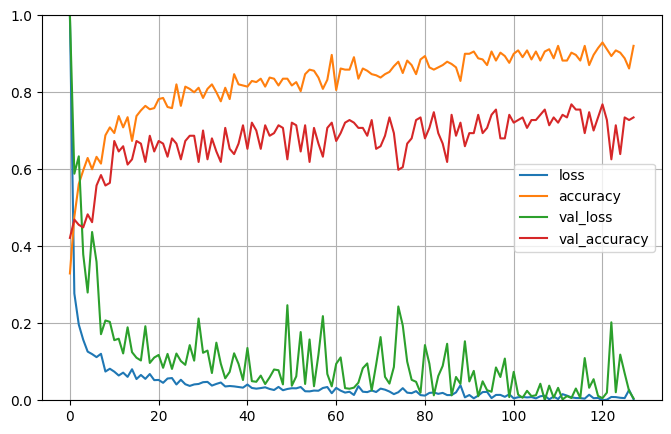

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()